Para obtener un mejor resultado en la integración es mejor utilizar la aproximación de segundo orden y con varias variables. Como vimos en clase:

$$
\vec y_{n+1} = \vec y_n + h\vec f + \frac{1}{2}h^2 \left( \frac{\partial \vec f}{\partial x} + \mathbb{J}\vec f \right)
$$

dond $\vec f$ es $f(x_n,\vec y_n)$, $\mathbb{J}$ es el jacobiano de $f$ evaluado en $\left( x_n , \vec y_n \right)$, y el orden del error es $O\left( h^2 \right)$

In [2]:
from pylab import *
%matplotlib inline

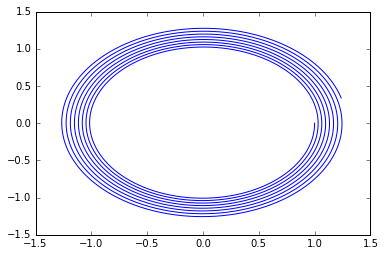

In [3]:
def integra2(ec,d_ec,p_ini,x,h=0.1):
    #f = ec(p_ini)[0]
    #df = d_ec(p_ini)[0]
    #Jac = d_ec(p_ini)[0]
    tiempos = arange(x[0],x[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:] = p_ini
    for i in xrange(len(tiempos)-1):
        f=ec(sol[i,:],tiempos[i])
        sol[i+1,:] = sol[i,:] + h*f
    #jn1=yn + (h*f) + (0.5h*h*(jac[0] + dot(jac[1],f))) 
    return tiempos,sol

def prueba(y,t):
    return array([y[1],-y[0]])

def d_prueba(y,t):
    return array([0,0]),array([[0,1],[-1,0]])

t,y=integra2(prueba,0,[1,0],[0,50],0.01)
#plot(t,y[:,0],t,cos(t))
plot(y[:,0],y[:,1])

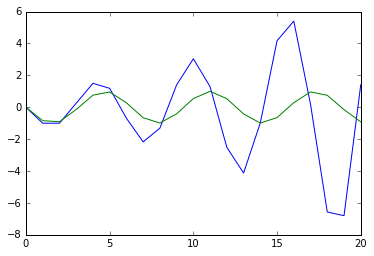

In [4]:
def integra2(ec,d_ec,p_ini,x,h=0.1):
    tiempos = arange(x[0],x[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:] = p_ini
    for i in xrange(len(tiempos)-1):
        f=ec(sol[i,:],tiempos[i])
        df,jac = d_ec(sol[i,:],tiempos[i])
        sol[i+1,:] = sol[i,:] + h*f + (0.5*h*h*(df + dot(jac,f)))
        
    return tiempos,sol

def prueba(y,t):
    return array([y[1],-y[0]])

def d_prueba(y,t):
    return array([0,0]),array([[0,1],[-1,0]])

t,y=integra2(prueba,d_prueba,[1,0],[0,20],1)
#plot(t,y[:,0],t,cos(t))
plot(t,y[:,1],t,-sin(t))

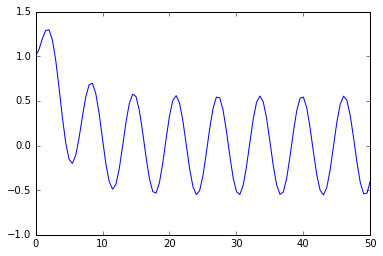

In [5]:
def p(y,t):
    return array([y[1],-2*y[1]-0.5*sin(y[0])+cos(t)])

def dp(y,t):
    return array([0,cos(t)]),array([[0,1],[-0.5*cos(y[1]),-2]])

t,y=integra2(p,dp,[1,0],[0,50],0.5)
plot(t,y[:,0])

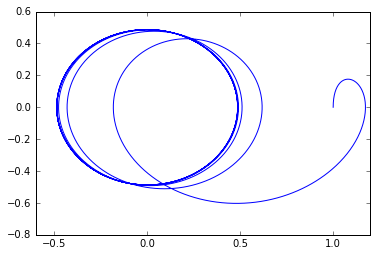

In [6]:
def p(y,t):
    return array([y[1],-2*y[1]-0.5*sin(y[0])+cos(t)])

def dp(y,t):
    return array([0,cos(t)]),array([[0,1],[-0.5*cos(y[1]),-2]])

t,y=integra2(p,dp,[1,0],[0,50],0.01)
plot(y[:,0],y[:,1])

In [7]:
a=array([2,6])
b=[2,6]
print 2*a,2*b

[ 4 12] [2, 6, 2, 6]


In [8]:
A=array([[1,0],[0,1]])
B=matrix([[1,0],[0,1]])
print A,A[0,0]
print B
print dot(B,b),dot(A,b)

[[1 0]
 [0 1]] 1
[[1 0]
 [0 1]]
[[2 6]] [2 6]


In [9]:
a = range(6)
print a

[0, 1, 2, 3, 4, 5]


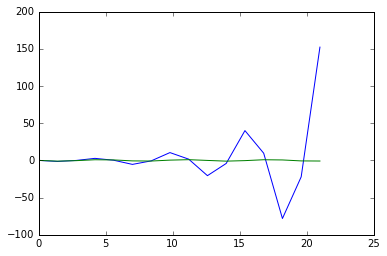

In [10]:
def integra2(ec,d_ec,p_ini,x,h=0.1):
    tiempos = arange(x[0],x[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:] = p_ini
    for i in xrange(len(tiempos)-1):
        f=ec(sol[i,:],tiempos[i])
        df,jac = d_ec(sol[i,:],tiempos[i])
        sol[i+1,:] = sol[i,:] + h*f + (0.5*h*h*(df + dot(jac,f)))
        
    return tiempos,sol

def prueba(y,t):
    return array([y[1],-y[0]])

def d_prueba(y,t):
    return array([0,0]),array([[0,1],[-1,0]])

t,y=integra2(prueba,d_prueba,[1,0],[0,20],1.4)
plot(t,y[:,1],t,-sin(t))

# Método de Runge Kutta

Integraremos usando el método de Runge Kutta de segundo orden

$$
\vec y_n+1 = \vec y_n + hf \left( x_n + \frac{1}{2}h, y_n + \frac{1}{2}hf \left( x_n,y_n \right) \right)
$$


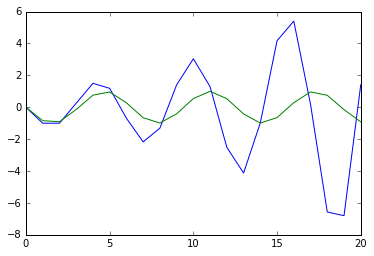

In [11]:
def integra3(ec,p_ini,x,h=0.1):
    tiempos = arange(x[0],x[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:] = p_ini
    for i in xrange(len(tiempos)-1):
        k=h*ec(sol[i,:],tiempos[i])
        sol[i+1,:] = sol[i,:] + h*ec(sol[i,:]+0.5*k,tiempos[i]+0.5*h)
        
    return tiempos,sol

def prueba(y,t):
    return array([y[1],-y[0]])

t,y=integra3(prueba,[1,0],[0,20],1)
plot(t,y[:,1],t,-sin(t))

In [12]:
print prueba(y,t)

[[ 0.5 -1. ]
 [-1.  -0. ]]
